In [6]:
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import contingency
import seaborn as sns
import psycopg2
conn = psycopg2.connect("host=localhost dbname=AMS user=postgres password=ia09")
cwd = os.getcwd()

In [3]:
cwd = os.getcwd()
directory = cwd + '/../04_Results/AOI_medium'
print directory

/Users/ckwang/Google Drive/Master Studies/03. TU Delft/09. Graduation/spatio-temporal-analysis/08_Validation/03_VisualAnalysis/../04_Results/AOI_medium


In [8]:
def readDF(filePath, fileName):
    path = filePath + '/' + str(fileName) + '.csv'
    df = pd.read_csv(path, delimiter=';', index_col=False)
    return df

# Preliminary analysis

In [10]:
def plot(cleanedDF, fileName):
    palette = plt.get_cmap('Set1')
    cleanedDF.plot(figsize=(13, 7),alpha=0.7)
    
    simulationYr = fileName[-4:]
    
    xticks = []
    for i in range(len(cleanedDF)):
        postcode = cleanedDF.iloc[i,0]
        archetype = cleanedDF.iloc[i,1]
        xtick = str(postcode+', '+archetype)
        xticks.append(xtick)
    x_pos = np.arange(len(xticks))
    
    plt.legend(["liander_{} kWh/m$^3$".format(simulationYr), 
                "baseline_{} kWh/m$^3$".format(simulationYr), 
                "calibrated_{} kWh/m$^3$".format(simulationYr)])
    plt.xticks(x_pos, xticks, rotation = 30)
    plt.ylim((20, 55))
    plt.title('Postcode 6 level calibrated result validation, {}'.format(simulationYr), fontsize=16)
    plt.xlabel('postcode, archetype', fontsize=14)
    plt.ylabel("Energy Use Intensity kWh/m$^3$", fontsize=14)

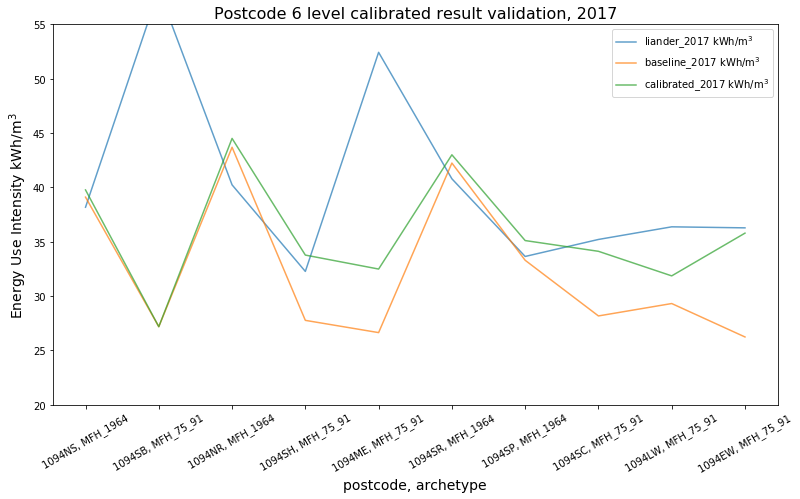

In [34]:
fileName = 'AOI_small_validation_comparison_2017'
df = readDF(directory, fileName)
plot(df, fileName)

# Absolute percentage error comparison

In [42]:
def computePE(cleanedDF, simulationYr):
    liander_pc6 = cleanedDF['l_pc6_consumption_kwh_m3']
    baseline_pc6 = cleanedDF['validation_baseline_{}_kwh_m3'.format(simulationYr)]
    calibrated_pc6 = cleanedDF['validation_calibrated_{}_kwh_m3'.format(simulationYr)]
    
    cleanedDF['PE_baseline'] = abs(liander_pc6-baseline_pc6)*100/liander_pc6
    cleanedDF['PE_calibrated'] = abs(liander_pc6-calibrated_pc6)*100/liander_pc6
    return cleanedDF

def plotPE(df, fileName):
    plt.figure(figsize=(14, 7))
    palette = plt.get_cmap('Set1')
    barWidth = 0.4
    
    simulationYr = fileName[-4:]
    cleanedDF = computePE(df, simulationYr)
    
    xticks = []
    for i in range(len(cleanedDF)):
        postcode = cleanedDF.iloc[i,0]
        archetype = cleanedDF.iloc[i,1]
        xtick = str(postcode+', '+archetype)
        xticks.append(xtick)

    r1 = np.arange(len(xticks))
    r2 = [x + barWidth for x in r1]
    plt.bar(r1, cleanedDF['PE_baseline'],width = barWidth, color=palette(4), alpha=0.7, label='baseline')
    plt.bar(r2, cleanedDF['PE_calibrated'],width = barWidth, color=palette(2), alpha=0.7, label='calibrated')
    
    plt.legend(fontsize = 13)
    plt.xticks(r1, xticks, rotation = 25)
    plt.ylim((0, 50))
    
    plt.axhline(y=5, color=palette(0), linestyle='-', linewidth=1)
    plt.annotate('ASHRAE allowable PE', xy=(0, 5), xytext=(11.5, 5.5), fontsize= 13)
    
    plt.title('Absolute percentage error: baseline v.s. calibrated, {}'.format(simulationYr), fontsize=17)
    plt.xlabel('postcode, archetype', fontsize=14)
    plt.ylabel("Percentage error %", fontsize=15)
    plt.tick_params(axis='both', labelsize=12.5)
    
    plt.savefig('images/Absolute_PE_{}.png'.format(simulationYr))

/Users/ckwang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ckwang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


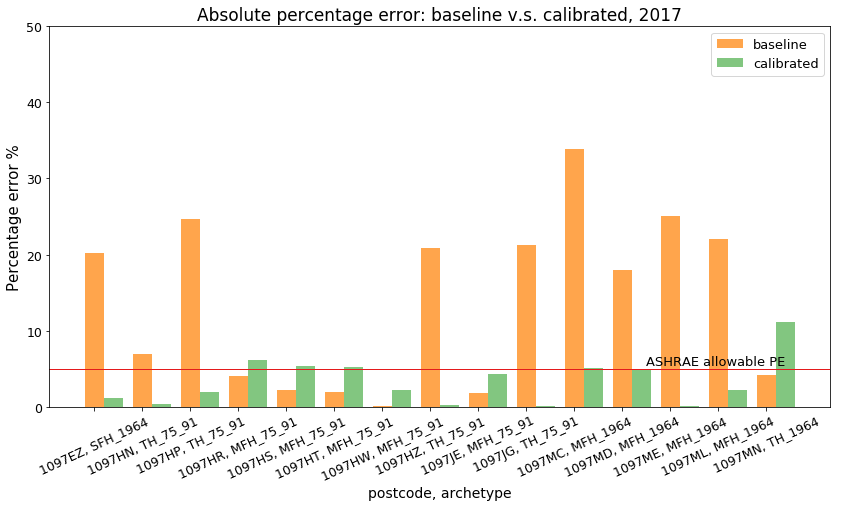

In [44]:
directory = cwd + '/../04_Results/AOI_all'
fileName = 'AOI_all_validation_comparison_2017'
df = readDF(directory, fileName)
plotPE(df.loc[0:14,:], fileName)

In [64]:
simulationYr = '2017'
directory = cwd + '/../04_Results/AOI_all'
fileName = 'AOI_all_validation_comparison_2017'
df = readDF(directory, fileName)
result = computePE(df, simulationYr)
avgPE_baseline = np.mean(result['PE_baseline'])
print 'baseline: ', avgPE_baseline
avgPE_calibrated = np.mean(result['PE_calibrated'])
print 'calibrated: ', avgPE_calibrated
print len(result)

baseline:  19.9296679521
calibrated:  7.69568976264
85


# Scatter plot

In [127]:
def plotScatter(df, fileName):
    simulationYr = fileName[-4:]
    
    f, ax = plt.subplots(figsize=(8, 8))
    palette = plt.get_cmap('Set1')
    
    liander_pc6 = df['l_pc6_consumption_kwh_m3']
    baseline_pc6 = df['validation_baseline_{}_kwh_m3'.format(simulationYr)]
    calibrated_pc6 = df['validation_calibrated_{}_kwh_m3'.format(simulationYr)]
    
    ax.scatter(liander_pc6, baseline_pc6, color=palette(4), alpha=0.7, label='baseline')
    ax.scatter(liander_pc6, calibrated_pc6, color=palette(2), alpha=0.7, label='calibrated')
 
    plt.legend(loc='lower right', fontsize=12.5)
    plt.ylim((0, 450))
    plt.xlim((0, 450))
    
    ASHRAE_10_per = (0*0.95, 450*0.95)
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="-", c=".3", alpha=0.4)
    ax.plot(ASHRAE_10_per, ax.get_ylim(), ls=":", c=".3", alpha=0.7)
    ax.plot(ax.get_xlim(), ASHRAE_10_per, ls=":", c=".3", alpha=0.7) 
    plt.annotate('ASHRAE allowable 5% PE', xy=(0, 5), xytext=(296, 430), rotation=47, size=11.5)
    
    plt.title('Measurement v.s. Simulation EUI (kWh/m$^3$), {}'.format(simulationYr), fontsize=16)
    plt.xlabel('Poctcode 6 measurement EUI (kWh/m$^3$)', fontsize=15)
    plt.ylabel('Poctcode 6 simulation EUI (kWh/m$^3$)', fontsize=15)
    plt.tick_params(axis='both', labelsize=12.5)
    
    plt.savefig('images/Validation_{}.png'.format(simulationYr))
    
    plt.show()
    

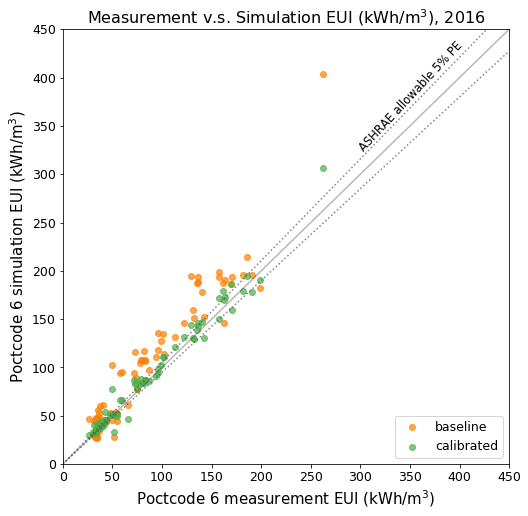

In [131]:
directory = cwd + '/../04_Results/AOI_all'
fileName = 'AOI_all_validation_comparison_2016'
df = readDF(directory, fileName)
plotScatter(df, fileName)

# Archetype Tmin, Ninf distribution

In [3]:
def readCSV():
    path = cwd + '/../04_Results/pc6_posterior_results.csv'
    df = pd.read_csv(path, delimiter=',', index_col=False)
    return df

In [4]:
def plotDistribution(df):
    
    plt.figure(figsize=(10, 10))
    
    sns.boxplot(x=df["archetype"],y=df["post_Tmin"])
    ax = sns.swarmplot(x=df["archetype"],y=df["post_Tmin"], color="grey")

In [579]:
def queryFromDB(trainingPhase):
    cur = conn.cursor()
    cur.execute(
        """
        select *
        from "pc6_posterior_results"
        where "trainingPhase" =""" + str(trainingPhase) + """ 
        order by "archetype"
        """
    )
    data = cur.fetchall()
    colnames = [desc[0] for desc in cur.description]
    retrieved = pd.DataFrame(data, columns=colnames)
    cur.close()
    conn.commit()
    return retrieved

def computeMarginalTmin(jointProb):
    npMatrix = np.reshape(jointProb, (5,5))
    marginalProb = contingency.margins(npMatrix)
    Tmin_Prob = marginalProb[0].transpose()[0]
    return Tmin_Prob

def computeMarginalNinf(jointProb):
    npMatrix = np.reshape(jointProb, (5,5))
    marginalProb = contingency.margins(npMatrix)
    Ninf_Prob = marginalProb[1][0]
    return Ninf_Prob


def plotHeatMap(trainingPhase, Variable):
    plt.figure(figsize=(5,16))
    df = queryFromDB(trainingPhase)
    palette = plt.get_cmap('Set1')
    if Variable == 'Tmin':
        df[str(Variable)] = map(computeMarginalTmin, df['posterior'])
        expandedDF = np.array(df.loc[:,str(Variable)].apply(pd.Series))
        cleanedDF = pd.DataFrame(data=expandedDF, index = df.loc[:,'archetype'], 
                                 columns = ['15', '16.25', '17.5', '18.75', '20'])
        xLabel = 'Thermostat setting (Tmin)'
    else:
        df[str(Variable)] = map(computeMarginalNinf, df['posterior'])
        expandedDF = np.array(df.loc[:,str(Variable)].apply(pd.Series))
        cleanedDF = pd.DataFrame(data=expandedDF, index = df.loc[:,'archetype'], 
                                 columns = ['0.19', '0.345', '0.5', '0.655', '0.81'])
        xLabel = 'Infiltration rate (Ninf)'
    
    
    sns.heatmap(cleanedDF, cmap="YlGn", yticklabels=True, alpha = 0.8)
    
    plt.title('{} posterior distribution'.format(Variable), fontsize=16)
    plt.ylabel('Archetype', fontsize=15)
    plt.xlabel(xLabel, fontsize=15)
    plt.tick_params(axis='both', labelsize=10)
    
    plt.savefig('images/Heatmap_{}.png'.format(Variable))
    
    return cleanedDF

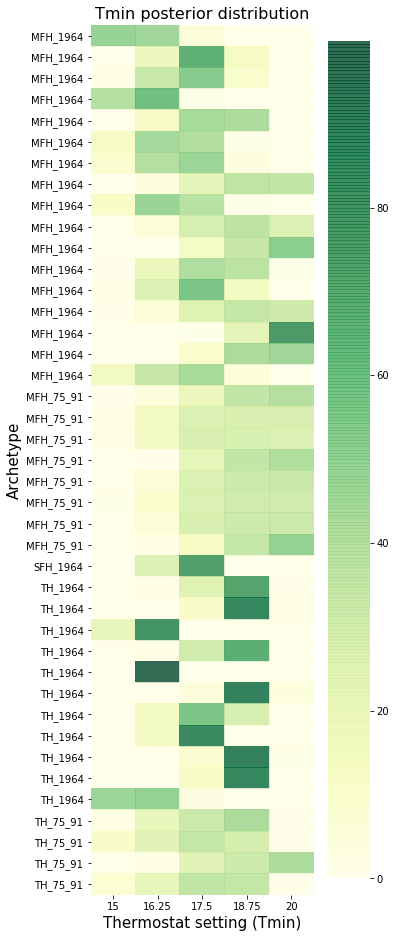

In [583]:
cleanedDF = plotHeatMap(6, 'Tmin')

In [531]:
def sliceDF(df, archetype):
    return df.loc[str(archetype)]

def subplots(cleanedDF):
    width = len(cleanedDF)
    fig = plt.figure(figsize=(15, 4))
    grid = plt.GridSpec(1, width, wspace=1.5, hspace=0.5)

    for archetype in cleanedDF.index.unique():
        partialDF = sliceDF(cleanedDF, archetype)
        
        if type(sliceDF(cleanedDF, archetype)) != pd.core.frame.DataFrame:
            partialDF = pd.DataFrame([partialDF], columns=['15', '16.25', '17.5', '18.75', '20'])
        dfLength = len(partialDF)    
        start = cleanedDF.index.tolist().index(archetype)
        end = start + dfLength
#         print start 
#         print end
        subplots = fig.add_subplot(grid[0,start:end])
        subplots = sns.heatmap(partialDF.transpose(), cmap="Greens", 
                               cbar=True, xticklabels=False, yticklabels=False)
        
    ytick = ['15', '16.25', '17.5', '18.75', '20']
    subplots.set_yticklabels(ytick)
    plt.show()

## Archetype EUI distribution

In [626]:
simuYr = '2017'
directory = cwd + '/../04_Results/AOI_all'
fileName = 'AOI_all_validation_comparison_' + simuYr
df = readDF(directory, fileName)
len(df)

85

In [623]:
import seaborn as sns

def plotDist(simuYr):
    plt.figure(figsize=(7,8))
    color = plt.get_cmap('Set1')

    # Make boxplot for one group only
    sns.boxplot(x=df["archetype"],y=df["l_pc6_consumption_kwh_m3"], order=["MFH_75_91", "MFH_1964", "TH_75_91", "TH_1964", "SFH_1964"], palette=color([2]), boxprops=dict(alpha=.8), width=0.4)
    ax = sns.swarmplot(x=df["archetype"],y=df["l_pc6_consumption_kwh_m3"], order=["MFH_75_91", "MFH_1964", "TH_75_91", "TH_1964", "SFH_1964"], color="grey")
    #sns.plt.show()
    plt.title('Measured EUI distribution per archetype, {}'.format(simuYr), fontsize=16)
    plt.ylabel('Heating EUI (kWh/m$^3 yr$)', fontsize=16)
    plt.xlabel('Archetype', fontsize=16)
    plt.xticks(rotation = 20)
    plt.tick_params(axis='both', labelsize=14)

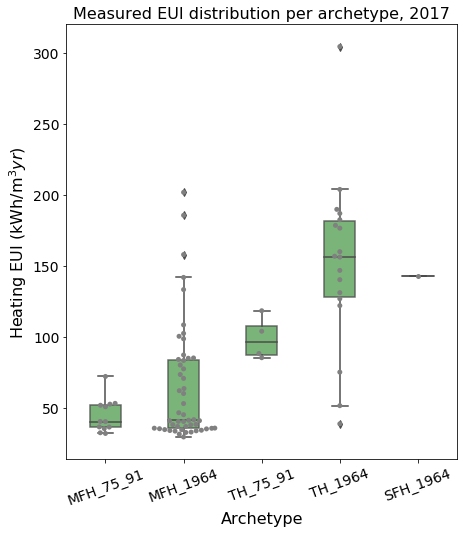

In [624]:
simuYr = '2017'
directory = cwd + '/../04_Results/AOI_all'
fileName = 'AOI_all_validation_comparison_' + simuYr
df = readDF(directory, fileName)

plotDist(simuYr)

# Computation time

In [638]:
r1 = np.arange(len([1]*3))
r1

array([0, 1, 2])

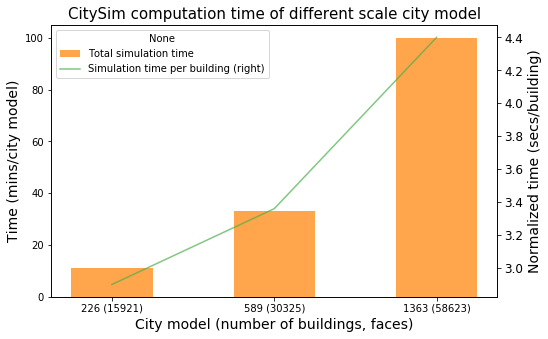

In [697]:

plt.figure(figsize=(8,5))


height = [11, 33, 100]
bars = ('226 (15921)', '589 (30325)', '1363 (58623)')
y_pos = np.arange(len(bars))

df2 = pd.DataFrame({'Simulation time per building': [2.9, 3.36, 4.4]}, index=['226 (15921)', '589 (30325)', '1363 (58623)'])

    
# Create bars
plt.bar(y_pos, height, width = 0.5, color=palette(4), alpha=0.7)
plt.ylabel('Time (mins/city model)', fontsize=14)
plt.xlabel('City model (number of buildings, faces)', fontsize=14)

plt.legend(["Total simulation time"])

df2['Simulation time per building'].plot(secondary_y=True, 
                                         color=palette(2), alpha=0.7, legend = True)
plt.ylabel('Normalized time (secs/building)', fontsize=14)


    
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('CitySim computation time of different scale city model', fontsize=15)
plt.xticks(rotation = 20)
plt.tick_params(axis='both', labelsize=12)


plt.show()

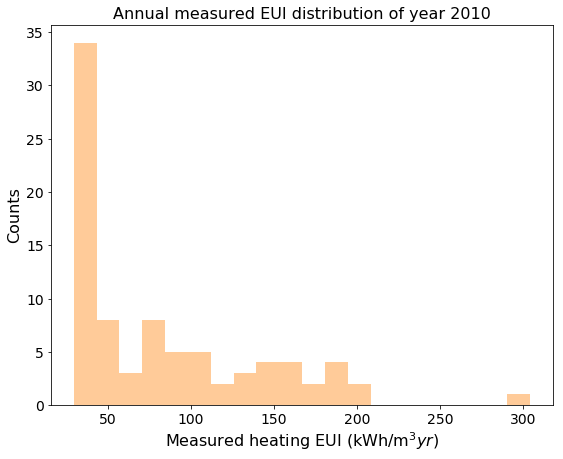

In [627]:
plt.figure(figsize=(9, 7))
color = plt.get_cmap('Set1')

sns.distplot( a=df["l_pc6_consumption_kwh_m3"], hist=True, kde=False, rug=False, bins=20, color=color(4))

plt.title('Annual measured EUI distribution of year 2010', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.xlabel('Measured heating EUI (kWh/m$^3 yr$)', fontsize=16)
plt.tick_params(axis='both', labelsize=14)

# Comparing inferenced input sets (unmodified v.s. likelihood modified model)

In [112]:
path1 = cwd + '/../04_Results/pc6_posterior_results.csv'
unmodified_df = pd.read_csv(path1, delimiter=',', index_col="postcode")

path2 = cwd + '/../04_Results/pc6_posterior_results_likelihood_modified.csv'
modified_df = pd.read_csv(path2, delimiter=',', index_col="postcode")

compared_df = unmodified_df.join(modified_df, how="left", rsuffix="_modified")

(14, 21)

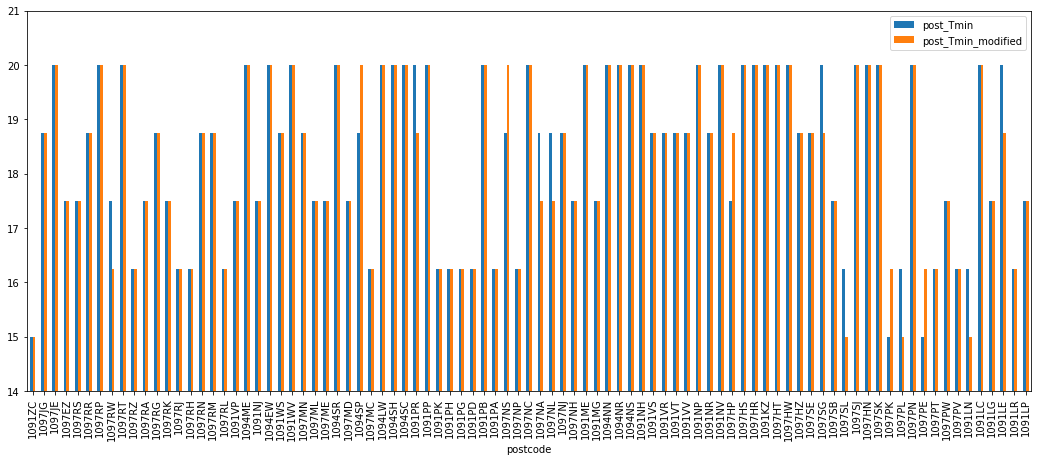

In [95]:
compared_df.loc[:, ["post_Tmin", "post_Tmin_modified"]].plot.bar(figsize=(18,7))
plt.ylim((14, 21))

(0.1, 0.85)

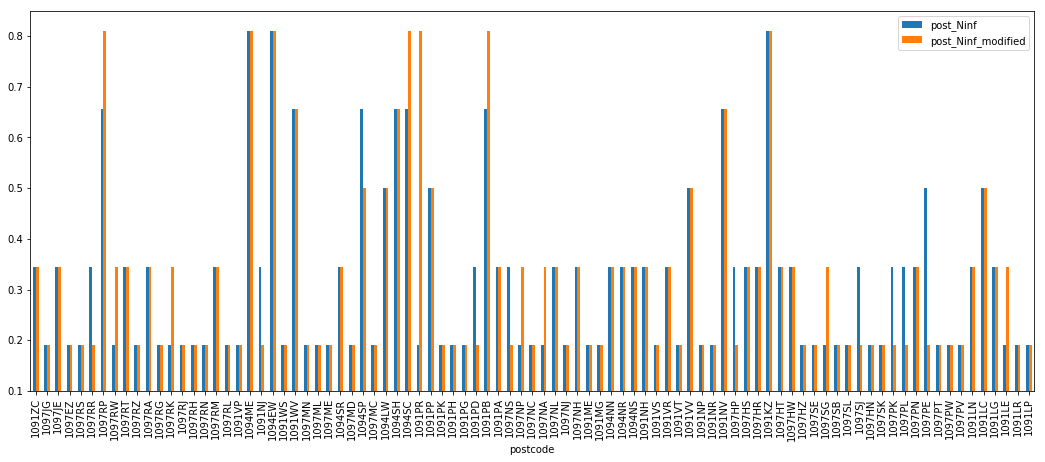

In [96]:
compared_df.loc[:, ["post_Ninf", "post_Ninf_modified"]].plot.bar(figsize=(18,7))
plt.ylim(0.1,0.85)

In [113]:
df = compared_df.loc[:, ["post_Ninf", "post_Ninf_modified", "post_Tmin", "post_Tmin_modified"]]
df["Ninf_diff"] = compared_df["post_Ninf"] - compared_df["post_Ninf_modified"]
df["Tmin_diff"] = compared_df["post_Tmin"] - compared_df["post_Tmin_modified"]
df.style.background_gradient(subset=["Ninf_diff", "Tmin_diff"], cmap="YlGn")

,post_Ninf,post_Ninf_modified,post_Tmin,post_Tmin_modified,Ninf_diff,Tmin_diff
postcode,,,,,,
1091ZC,0.345,0.345,15,15,0,0
1097JG,0.19,0.19,18.75,18.75,0,0
1097JE,0.345,0.345,20,20,0,0
1097EZ,0.19,0.19,17.5,17.5,0,0
1097RS,0.19,0.19,17.5,17.5,0,0
1097RR,0.345,0.19,18.75,18.75,0.155,0
1097RP,0.655,0.81,20,20,-0.155,0
1097RW,0.19,0.345,17.5,16.25,-0.155,1.25
1097RT,0.345,0.345,20,20,0,0
